In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from utils.chi_square import perform_chi_square_test
from scipy.stats import shapiro 


In [30]:
df = pd.read_csv('./data/train.csv')

In [31]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
numeric_df = df.select_dtypes(exclude=['object'])
categorical_df = df.select_dtypes(include=['object'])

In [36]:
numeric_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
corr_matrix = numeric_df.corr()

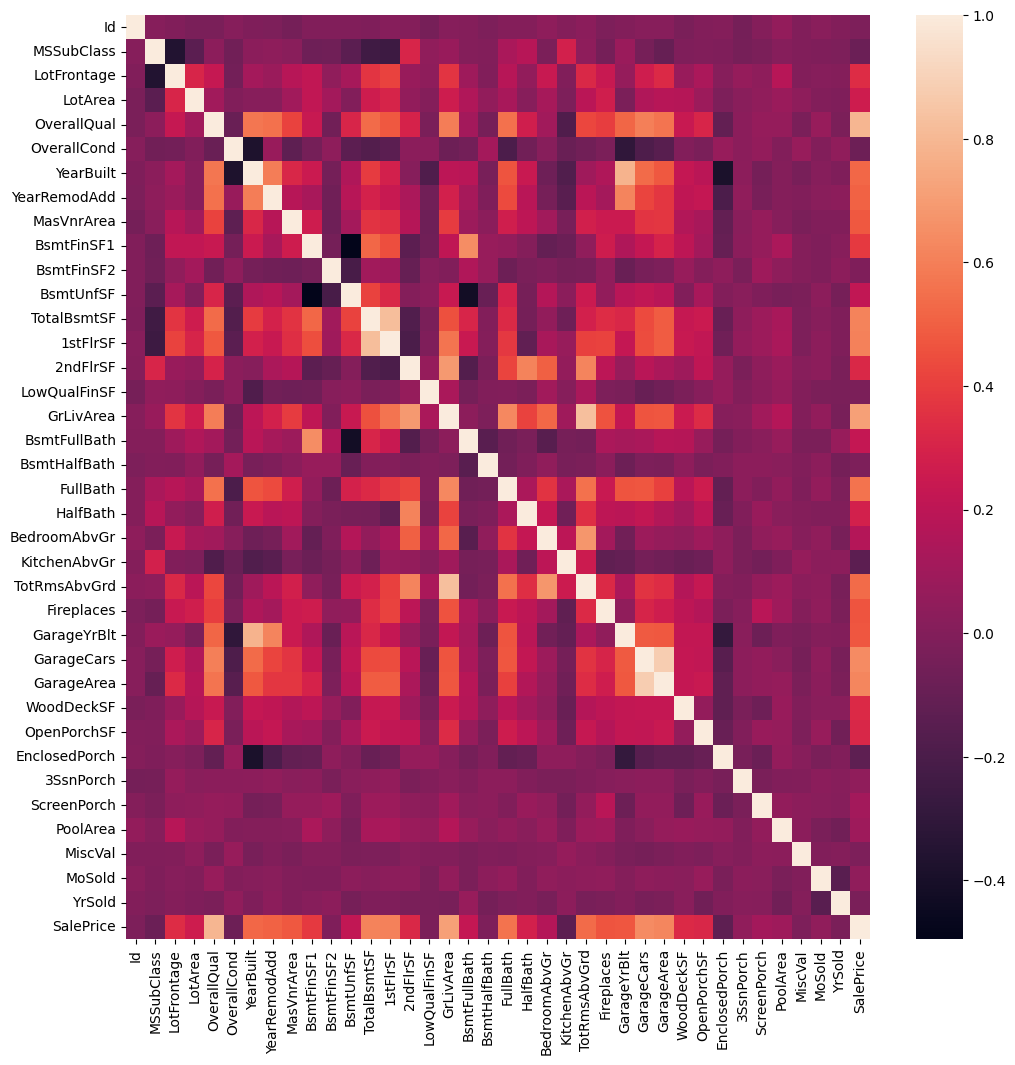

In [46]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix)
plt.show()

In [86]:
threshold = 0.1
numeric_df = df.select_dtypes(exclude=['object'])
x=numeric_df.drop(['SalePrice','Id'], axis=1)
y=numeric_df['SalePrice']
corr_y = []
print('Correlation with SalePrice below threshold of', threshold)
for i in x.columns:
    corr_val=np.corrcoef(x[i],y)
    if abs(corr_val[0][1])<threshold:
        print(i, corr_val[0][1])

Correlation with SalePrice below threshold of 0.1
MSSubClass -0.08428413512659529
OverallCond -0.07785589404867806
BsmtFinSF2 -0.011378121450215117
LowQualFinSF -0.02560613000067956
BsmtHalfBath -0.016844154297359002
3SsnPorch 0.04458366533574846
PoolArea 0.09240354949187315
MiscVal -0.021189579640303248
MoSold 0.04643224522381939
YrSold -0.028922585168730412


In [84]:
df = pd.read_csv('./data/train.csv')
categorical = df.select_dtypes(include=['object']).columns       
col_significance= [(col,perform_chi_square_test(df,col,'SalePrice')) for col in categorical]
for sig in col_significance:
    if sig[1][2]==False:
        print("Column to drop due to insignificant values: ", sig[0], " p-value: ", sig[1][1])


Column to drop due to insignificant values:  Alley  p-value:  0.20972415885759163
Column to drop due to insignificant values:  LandContour  p-value:  0.08674645041917711
Column to drop due to insignificant values:  Utilities  p-value:  1.0
Column to drop due to insignificant values:  LandSlope  p-value:  0.10508638737793884
Column to drop due to insignificant values:  Condition1  p-value:  1.0
Column to drop due to insignificant values:  Condition2  p-value:  0.07598640644469955
Column to drop due to insignificant values:  BldgType  p-value:  0.9999860714473023
Column to drop due to insignificant values:  HouseStyle  p-value:  0.6482615179447816
Column to drop due to insignificant values:  RoofStyle  p-value:  1.0
Column to drop due to insignificant values:  RoofMatl  p-value:  1.0
Column to drop due to insignificant values:  Exterior1st  p-value:  0.9999839433628513
Column to drop due to insignificant values:  Exterior2nd  p-value:  0.8469189757654344
Column to drop due to insignifica

In [102]:
missing_values_cols = []
missing_values_count = df.isnull().sum()
numeric_df = df.select_dtypes(exclude=["object"])
for col in missing_values_count[missing_values_count > 0].index:
    if col in numeric_df.columns:
        print("Numerical: ",col, shapiro(numeric_df[col].dropna()))
    else:
        print("Categorical: ",col, False)



Numerical:  LotFrontage ShapiroResult(statistic=np.float64(0.8804028736502089), pvalue=np.float64(2.0016921293556985e-29))
Categorical:  Alley False
Categorical:  MasVnrType False
Numerical:  MasVnrArea ShapiroResult(statistic=np.float64(0.6392859612728288), pvalue=np.float64(6.556644985817793e-48))
Categorical:  BsmtQual False
Categorical:  BsmtCond False
Categorical:  BsmtExposure False
Categorical:  BsmtFinType1 False
Categorical:  BsmtFinType2 False
Categorical:  Electrical False
Categorical:  FireplaceQu False
Categorical:  GarageType False
Numerical:  GarageYrBlt ShapiroResult(statistic=np.float64(0.9209431637948045), pvalue=np.float64(2.816782830710865e-26))
Categorical:  GarageFinish False
Categorical:  GarageQual False
Categorical:  GarageCond False
Categorical:  PoolQC False
Categorical:  Fence False
Categorical:  MiscFeature False
